<a href="https://colab.research.google.com/github/KhizarJamshaidIqbal/Xception_Model/blob/main/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import All NecessaryPackages**

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import load_model
import os
import cv2
import numpy as np
from keras.preprocessing import image
from PIL import Image
from tensorflow import lite
from tensorflow.keras.models import load_model

# **Connect With the GoogleDrive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# preprocessing the Data

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [299, 299]


train_path = '/content/gdrive/MyDrive/dataset/Pakistan/Training'
valid_path = '/content/gdrive/MyDrive/dataset/Pakistan/Valid'

# add preprocessing layer to the front of xception
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in xception.layers:
  layer.trainable = False

# useful for getting number of classes
folders = glob('/content/gdrive/MyDrive/dataset/Pakistan/Training/*')
print(folders)

# our layers - you can add more if you want
x = Flatten()(xception.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=xception.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

83683744/83683744 [==============================] - 4s 0us/step
['/content/gdrive/MyDrive/dataset/Pakistan/Training/50Rs', '/content/gdrive/MyDrive/dataset/Pakistan/Training/5000Rs', '/content/gdrive/MyDrive/dataset/Pakistan/Training/500Rs', '/content/gdrive/MyDrive/dataset/Pakistan/Training/50Rsback', '/content/gdrive/MyDrive/dataset/Pakistan/Training/500Rsback', '/content/gdrive/MyDrive/dataset/Pakistan/Training/5000Rsback', '/content/gdrive/MyDrive/dataset/Pakistan/Training/10Rsback', '/content/gdrive/MyDrive/dataset/Pakistan/Training/10Rs', '/content/gdrive/MyDrive/dataset/Pakistan/Training/20Rs', '/content/gdrive/MyDrive/dataset/Pakistan/Training/100Rsback', '/content/gdrive/MyDrive/dataset/Pakistan/Training/20Rsback', '/content/gdrive/MyDrive/dataset/Pakistan/Training/100Rs', '/content/gdrive/MyDrive/dataset/Pakistan/Training/1000Rs', '/content/gdrive/MyDrive/dataset/Pakistan/Training/1000Rsback', '/content/gdrive/MyDrive/dataset/Pakistan/Training/Other']
Model: "model"
________

**ImageDataGenerator**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/dataset/Pakistan/Training',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/dataset/Pakistan/Valid',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2066 images belonging to 15 classes.
Found 241 images belonging to 15 classes.


# **Run epochs**

In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-6-39a22121036e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
65/65 [==============================] - 1869s 29s/step - loss: 8.4666 - accuracy: 0.4211 - val_loss: 3.1070 - val_accuracy: 0.6763
Epoch 2/5
65/65 [==============================] - 1166s 18s/step - loss: 2.4752 - accuracy: 0.7294 - val_loss: 3.0515 - val_accuracy: 0.7220
Epoch 3/5
65/65 [==============================] - 1157s 18s/step - loss: 1.8432 - accuracy: 0.7943 - val_loss: 3.6879 - val_accuracy: 0.7469
Epoch 4/5
65/65 [==============================] - 1176s 18s/step - loss: 1.4135 - accuracy: 0.8393 - val_loss: 2.4798 - val_accuracy: 0.7759
Epoch 5/5
65/65 [==============================] - 1159s 18s/step - loss: 1.0446 - accuracy: 0.8809 - val_loss: 2.9780 - val_accuracy: 0.8008


# **loss Graph**

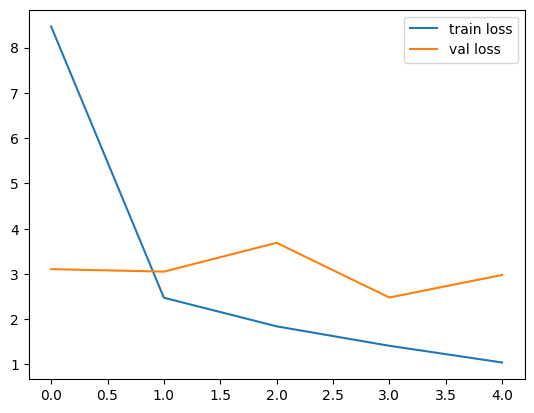

<Figure size 640x480 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

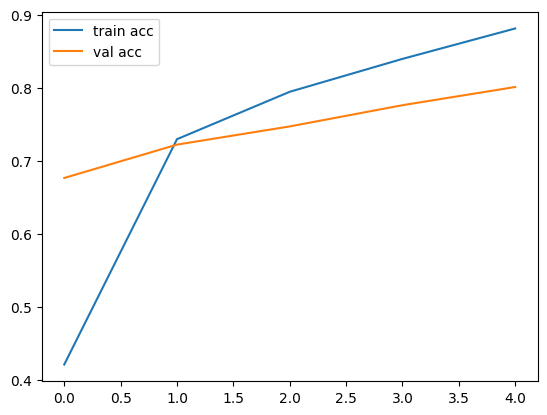

<Figure size 640x480 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')  # Corrected key
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# **Saved Model**

In [ ]:
# model.save('/content/gdrive/MyDrive/Models/VGG16/VGG16_AC_69/VGG16.h5')
model_save_path = '/content/gdrive/MyDrive/Models/Xception.h5'
model.save(model_save_path)
print('Your Model is==> ',os.getcwd())
# Confirm the save path
print(f"Model saved successfully at: {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Your Model is==>  /content
Model saved successfully at: /content/gdrive/MyDrive/Models/Xception.h5


# **Testing The Model**

In [ ]:
# Load the trained model
model_path = model_save_path
# Update with the actual path to your saved model
loaded_model = load_model(model_path)

In [ ]:
# Get the class names
class_names = sorted(training_set.class_indices.keys())
print(class_names)

['1000Rs', '1000Rsback', '100Rs', '100Rsback', '10Rs', '10Rsback', '20Rs', '20Rsback', '5000Rs', '5000Rsback', '500Rs', '500Rsback', '50Rs', '50Rsback', 'Other']


In [ ]:
# Specify the path to the test image
test_img_path = '/content/download.jpg'

# Function to preprocess an image
def preprocess_img(img_path):
    img = Image.open(img_path)  # Use PIL to open the image
    img = img.resize((224, 224))  # Resize the image
    img_array = np.array(img)  # Convert PIL image to NumPy array
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

# Function to predict the class of an image
def predict_class(img_path):
    img = preprocess_img(img_path)
    prediction = loaded_model.predict(img)
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

# Predict the class for the test image
predicted_class = predict_class(test_img_path)

# Display the test image and predicted class
test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

plt.imshow(test_img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 299, 299, 3), found shape=(None, 224, 224, 3)


# **Saved**


**TFLite Tensorflow Model**

In [ ]:
# Load the Keras model
model = load_model(model_save_path)

# Convert the model to TensorFlow Lite format
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('/content/gdrive/MyDrive/Models/Xception_Model.tflite', 'wb') as f:
    f.write(tflite_model)

**labels.txt**

In [ ]:
# Replace this list with your actual class labels
class_labels = class_names

# Save the class labels to a file
with open("labels.txt", "w") as file:
    for label in class_labels:
        file.write(label + "\n")

# Move the file to the desired directory
import shutil
shutil.move("labels.txt", "/content/gdrive/MyDrive/Models/")
